In [27]:
import h5py
import numpy as np
import os
from readable_number import ReadableNumber
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
rn = ReadableNumber
sns.set_theme()

experiment = "eval"

# config_folders = os.listdir(f"experiments/{experiment}")
benchmarks = ['CC', 'BFS', 'SSSP']
configs = ['1280MBLLC', '1408MBLLC']

data_dict = {}
for benchmark in benchmarks:
    benchmark_lower = benchmark.lower()
    data_dict[benchmark] = {}
    for config in configs:
        data_dict[benchmark][config] = h5py.File(f"experiments/{experiment}/{config}/{benchmark_lower}_data/zsim-ev.h5", 'r')["stats"]["root"]

#data_dict['BC']['1280MBLLC'][-1]['beefy']


<Figure size 2000x600 with 0 Axes>

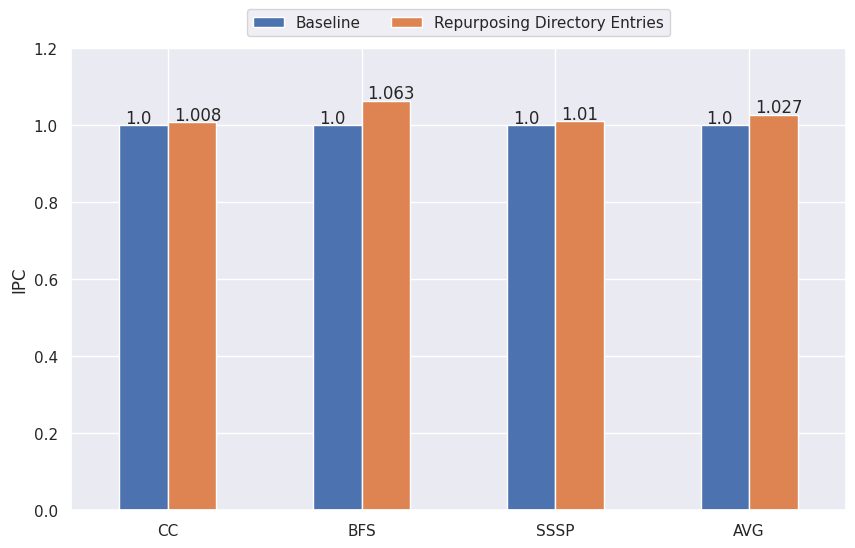

In [28]:

# calculate AVG
configs = ['1280MBLLC', '1408MBLLC']
ipcs = []
for i in range(len(configs)):
    ipcs.append([])
    for j in range(len(benchmarks)):
        ipc = np.sum(data_dict[benchmarks[j]][configs[i]][-1]['beefy']['instrs'])/np.sum(data_dict[benchmarks[j]][configs[i]][-1]['beefy']['cycles'])
        ipcs[i].append(ipc)
    ipcs[i] = np.array(ipcs[i])
    #print(ipcs[i])
    ipcs[i] = np.append(ipcs[i], np.mean(ipcs[i]))
    #pcs[i] = ipcs[i]/np.min(ipcs[i])

ipcs = np.array(ipcs)
ipcs = np.transpose(ipcs)
for i in range(len(ipcs)):
    ipcs[i] = ipcs[i]/np.min(ipcs[i])

#print(ipcs)

benchmark_labels = ['BC', 'CC', 'BFS', 'SSSP', 'AVG']
benchmark_labels = ['CC', 'BFS', 'SSSP', 'AVG']
config_labels= ['Baseline', 'Repurposing Directory Entries']
df = pd.DataFrame(data=ipcs, index=benchmark_labels, columns=config_labels)
#print(df)

#fig, ax = plt.subplots()
#ax.plot(data=df)
#plt.figure(figsize=(20,6))
#fig, ax = plt.subplots(figsize=(6, 6
plt.rcParams['figure.figsize'] = (10, 6);
plt.figure(figsize=(20, 6));
ax = df.plot.bar(stacked=False);
plt.legend(loc='upper center', bbox_to_anchor=(.5,1.1), ncol=len(config_labels)/1,);
plt.ylabel("IPC");
plt.xticks(rotation=0);
plt.ylim(0,1.2);
#plt.gca().set_aspect('equal')

## function to add value labels
#def addlabels(x,y):
#    for i in range(len(x)):
#        plt.text(i, y[i]+.01, y[i], ha = 'center')

#addlabels(config_labels, np.around(ipcs, decimals=2))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 3)), (p.get_x() + .03, p.get_height() * 1.005))

plt.savefig("figs/eval.pdf", bbox_inches='tight')
